In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [3]:
df = pd.DataFrame()
df['a'] = np.random.randint(10,50,10)      #pridejom stulpeli ,a yra stulpelio pavadinimas
df.to_csv('demoDF.csv', sep=';')     #sukurta lentele eksportuojam i csv faila ir atskiriam per ;

In [ ]:
#Surinkite visus kauno dienos straipsnių pavadinimus į pandas dataframe.
#pridėkite naują stulpelį, kuriame būtų žodžių kiekis kiekviename pavadinime
#pridėkite naują stulpelį, kuriame būtų pavadinime esančių simbolių kiekis
#eksportuokite tai į CSV failą
#eksportuotą CSV failą nuskaitykite su pandas
#Koks vidutinis žodžių kiekis pavadinimuose? 
#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose.
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)



In [41]:
KaunoDiena = pd.read_csv('20240419 darbai.csv' , sep=';')   
KaunoDiena.head()


,Unnamed: 0,Pavadinimas,žodžių_kiekis
0,0,Landynė daugiabutyje: ar gali būti blogiau?,6
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...,8
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...,10
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...,8
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade,5


In [42]:
#Koks vidutinis žodžių kiekis pavadinimuose? 
zodziu_vidurkisPavadinime = KaunoDiena["žodžių_kiekis"].mean()
zodziu_vidurkisPavadinime

9.170731707317072

In [50]:
KaunoDiena["simboliuKiekis"] = KaunoDiena["Pavadinimas"].str.split().str.len()
KaunoDiena.head()

,Unnamed: 0,Pavadinimas,žodžių_kiekis,simboliuKiekis
0,0,Landynė daugiabutyje: ar gali būti blogiau?,6,6
1,1,Smarkios avarijos Ramučiuose liudininkai: kalt...,8,8
2,2,Už šūkį „šlovė Ukrainai“ – išpuoliai prieš lie...,10,10
3,3,Kauno centre – girto vairuotojo šou: nukentėjo...,8,8
4,4,„Vičiūnų grupė“ pardavė gamyklą Kaliningrade,5,5


In [49]:
sarasas = pd.read_csv('20240419_darbai.csv', sep=';')
sarasas.head()
sarasas['zodziuKiekis'] = sarasas['Pavadinimas'].str.split().str.len()
sarasas.head()
sarasas['simboliuKiekis'] = sarasas['Pavadinimas'].str.len()
sarasas.head()
vidZod = sarasas['zodziuKiekis'].mean()
print(vidZod)
ZK = sarasas.groupby('zodziuKiekis').count().reset_index()[['zodziuKiekis','Pavadinimas']]
sns.barplot(data=ZK, x='zodziuKiekis', y='Pavadinimas')

#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)
ZK = KaunoDiena.groupby["žodžių_kiekis"].count().reset_index()[["žodžių_kiekis" , "Pavadinimas"]]
sns.barplot(data = ZK, x="žodžių_kiekis" , y= "Pavadinimas")

TypeError: 'method' object is not subscriptable

In [55]:
#Advanced: suraskite dažniausiai pasikartojantį žodį pavadinimuose.

VisuZodziuSarasas = []
for e in sarasas['Pavadinimas'].str.split():
    VisuZodziuSarasas.extend(e)
print(VisuZodziuSarasas)
VisiZodziai = pd.DataFrame() # naujos data frame sukurimas
VisiZodziai['zodziai'] = VisuZodziuSarasas
VisiZodziai['zodziai'].value_counts().sort_values(ascending=False).reset_index()



[['Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?'], ['Smarkios', 'avarijos', 'Ramučiuose', 'liudininkai:', 'kalti', 'neveikiantys', 'šviesoforai!', '(papildyta)'], ['Už', 'šūkį', '„šlovė', 'Ukrainai“', '–', 'išpuoliai', 'prieš', 'lietuvius', 'užsienio', 'kurortuose'], ['Kauno', 'centre', '–', 'girto', 'vairuotojo', 'šou:', 'nukentėjo', 'keleivis'], ['„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade'], ['Orai:', 'kai', 'kur', 'Lietuvoje', 'iš', 'dangaus', 'krito', 'snaigės'], ['Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė'], ['Lietingą', 'rytą', 'Kaune', 'lydėjo', 'avarijos'], ['Žada,', 'kad', 'iki', '2050-ųjų', 'žuvusiųjų', 'avarijose', 'nebebus:', 'kliedesiai', 'ar', 'realybė?'], ['„Vičiūnų', 'grupė“', 'pardavė', 'gamyklą', 'Kaliningrade'], ['Landynė', 'daugiabutyje:', 'ar', 'gali', 'būti', 'blogiau?'], ['Mugė', 'Laisvės', 'alėjoje', '–', 'dar', 'gausesnė'], ['JAV', 'žiniasklaida:', 'Izraelis', 'smogė', 'Iranui'], ['Sužydėjusios', 'Kauno', 'puošmenos', 'džiu

TypeError: unhashable type: 'list'

In [24]:
#Po kiek pavadinimų turėjo vienodą žodžių kiekį? Atsakymui pateikite vizualizaciją (grafiką)
VienodasZKiekis = KaunoDiena["žodžių_kiekis"].value_counts()
VienodasZKiekis.reset_index()

,žodžių_kiekis,count
0,7,23
1,10,17
2,11,17
3,8,15
4,12,14
5,6,11
6,5,7
7,9,6
8,13,6
9,14,5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


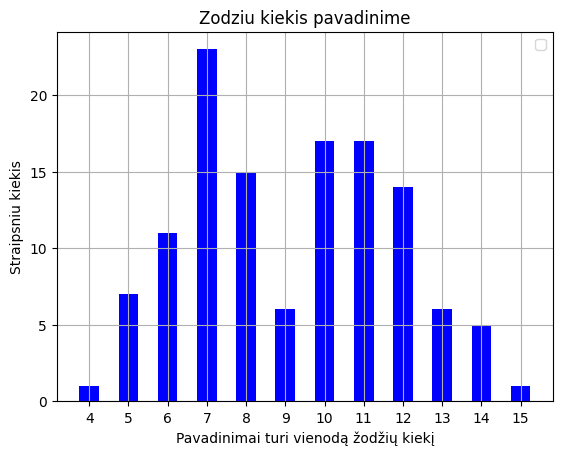

In [38]:
a = VienodasZKiekis.index
b = VienodasZKiekis.values
fig, ax = plt.subplots()

ax.bar(a, b ,color= "blue", width = 0.5)
ax.set_xticks(a)
ax.legend(loc='best')
ax.grid()
ax.set_xlabel("Pavadinimai turi vienodą žodžių kiekį")
ax.set_ylabel("Straipsniu kiekis")
ax.set_title("Zodziu kiekis pavadinime")
plt.show()